In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [3]:
df=pd.read_csv('data1.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
print('Total rows',df.shape)
print('Unique products',df.Description.nunique())
print('unique invoice number',df.InvoiceNo.nunique())
print('unique customer ID',df.CustomerID.nunique())
print('unique stockcodes',df.StockCode.nunique())

Total rows (541909, 8)
Unique products 4223
unique invoice number 25900
unique customer ID 4372
unique stockcodes 4070


In [7]:
x=df.Description.sample(10000)
x.head()

493287     ANTIQUE SILVER TEA GLASS ENGRAVED
541495        6 GIFT TAGS VINTAGE CHRISTMAS 
427625            JIGSAW TREE WITH BIRDHOUSE
124973    BLUE DRAWER KNOB ACRYLIC EDWARDIAN
69309                     PINK POLKADOT BOWL
Name: Description, dtype: object

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(x.astype('U').values)
X1

<10000x1576 sparse matrix of type '<class 'numpy.float64'>'
	with 40333 stored elements in Compressed Sparse Row format>

In [9]:
kval=[]
tot=100


for i in range(1,tot):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 50, n_init = 1)
    kmeans.fit_predict(X1)
    kval.append(kmeans.inertia_)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [10]:
kval

[9858.33007289351,
 9673.767860143358,
 9659.246868315211,
 9636.210878125026,
 9582.97300769396,
 9310.024108592364,
 9274.146234056228,
 9193.789214021586,
 9144.259167215925,
 9042.045021492888,
 8986.955009406967,
 8972.1613098688,
 8910.328071688362,
 8850.40554218804,
 8824.396536979324,
 8803.636045420946,
 8738.60305613855,
 8657.666111733417,
 8588.540076299758,
 8533.605958334612,
 8450.833864996617,
 8401.780899888441,
 8399.138171723525,
 8293.440642499552,
 8269.707293179024,
 8334.22092965603,
 8164.865783878828,
 8148.712949976864,
 8090.0498486623965,
 8066.784632246729,
 8031.138159592361,
 8065.0852607516235,
 8031.273251665681,
 8014.223896816444,
 7969.793672187885,
 7952.275601050209,
 7870.021238092035,
 7878.801467631119,
 7813.216370567585,
 7755.509146353376,
 7884.235191230907,
 7766.0867456559545,
 8079.3286163914645,
 7683.293974060741,
 7637.401695606122,
 7596.572360205338,
 7571.460694357135,
 7648.283513031271,
 7600.113028667971,
 7533.994279090606,
 75

In [11]:
val1=kval

In [12]:
# val1=[9855.991857188701,
#  9759.036417786112,
#  9560.73276304541,
#  9480.095218360293,
#  9428.782614430409,
#  9319.105979086818,
#  9229.52721344436,
#  9197.347710465589,
#  9107.528267604572,
#  9068.301760234664,
#  9000.820476052344,
#  8857.636546316695,
#  8918.827356294183,
#  8796.163518684452,
#  8721.636376434644,
#  8671.720961115194,
#  8713.80469670576,
#  8613.679292863755,
#  8545.988114785023]

Text(0, 0.5, 'Inertia')

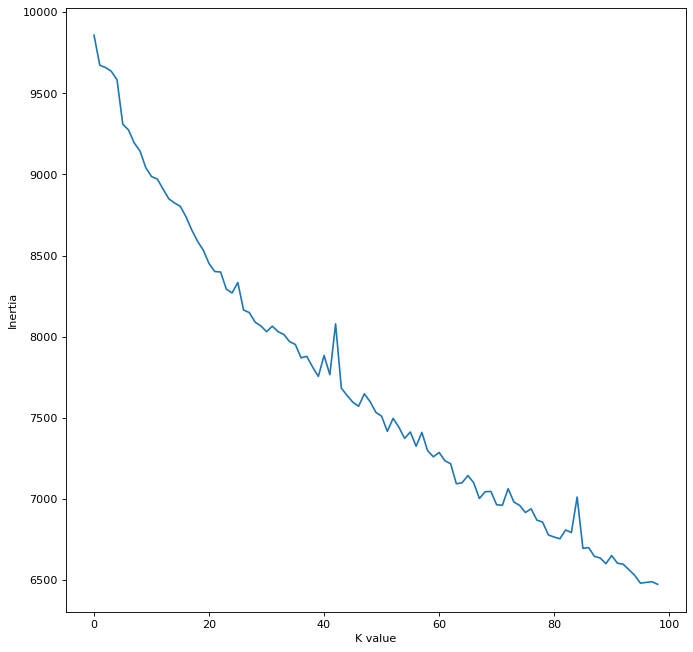

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
plt.plot(val1)
plt.xlabel('K value')
plt.ylabel('Inertia')


Text(0, 0.5, 'Inertia')

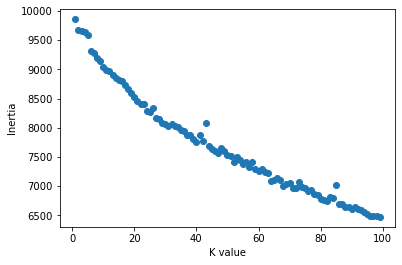

In [14]:
plt.scatter(range(1,tot),val1)
plt.xlabel('K value')
plt.ylabel('Inertia')

[0, 184.56221275015196, 14.520991828147089, 23.035990190184748, 53.23787043106677, 272.9488991015951, 35.877874536136005, 80.35702003464212, 49.530046805661186, 102.21414572303729, 55.090012085920534, 14.793699538167857, 61.83323818043755, 59.922529500321616, 26.00900520871619, 20.760491558377907, 65.03298928239565, 80.93694440513354, 69.12603543365913, 54.93411796514556, 82.7720933379951, 49.05296510817607, 2.642728164915752, 105.6975292239731, 23.73334932052785, -64.513636477006, 169.35514577720278, 16.152833901963277, 58.663101314467895, 23.265216415667055, 35.646472654368154, -33.947101159262274, 33.81200908594292, 17.049354849236806, 44.43022462855879, 17.51807113767609, 82.25436295817417, -8.780229539083848, 65.5850970635338, 57.70722421420851, -128.7260448775305, 118.14844557495235, -313.24187073551, 396.0346423307237, 45.89227845461846, 40.82933540078466, 25.111665848202392, -76.8228186741353, 48.17048436329969, 66.11874957736472, 24.016386392473578, 93.30515873146578, -80.0145

Text(0, 0.5, 'difference in inertia of consecutive k')

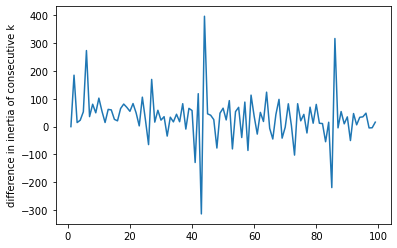

In [15]:
diff=[]
diff.append(0)
for i in range(1,tot-1):
    d=val1[i-1]-val1[i]
    diff.append(d)
print(diff)
plt.plot(range(1,tot),diff)
plt.ylabel('difference in inertia of consecutive k')

### Last K

In [16]:
kmeans.inertia_

6473.864771474625

In [17]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(500):
    print("\n\n Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),

Top terms per cluster:


 Cluster 0:
 kitchen
 red
 pink
 heart
 vintage
 blue
 nan
 scales
 key
 ribbon
 reel
 polkadot
 white
 green
 design


 Cluster 1:
 suki
 bag
 design
 storage
 charlotte
 lunch
 jumbo
 shoulder
 fair
 etched
 eucalyptus
 exercise
 extremely
 eye
 fabric


 Cluster 2:
 leaf
 vintage
 bag
 lunch
 doily
 jumbo
 design
 notepad
 magnetic
 storage
 tin
 wrap
 red
 doormat
 round


 Cluster 3:
 round
 cake
 red
 tin
 retrospot
 stand
 vintage
 container
 green
 tins
 set
 tier
 cream
 envelopes
 etched


 Cluster 4:
 folkart
 zinc
 sleigh
 bells
 dec
 winkie
 willie
 stick
 heart
 christmas
 candle
 kashmir
 baubles
 rings
 decorations


 Cluster 5:
 paisley
 jumbo
 bag
 pink
 vintage
 scandinavian
 picnic
 polkadot
 shopper
 park
 red
 blue
 overnight
 rose
 cabin


 Cluster 6:
 card
 birthday
 font
 billboard
 party
 spaceboy
 robot
 indians
 fancy
 games
 cowboys
 village
 tea
 cowboy
 circus


 Cluster 7:
 ceramic
 cake
 money
 bank
 cakes
 strawberry
 fairy
 st

 bubbles
 pack
 heart
 pen


 Cluster 75:
 lunch
 bag
 design
 spaceboy
 apple
 cars
 woodland
 box
 alphabet
 pattern
 polkadot
 doiley
 blue
 pink
 fob


 Cluster 76:
 box
 felt
 craft
 trinket
 blue
 harmonica
 pink
 cream
 face
 fabric
 zinc
 fair
 extremely
 exercise
 eucalyptus


 Cluster 77:
 charlotte
 bag
 strawberry
 shopper
 woodland
 polkadot
 pink
 alphabet
 picnic
 vintage
 apples
 design
 fan
 farm
 farthing


 Cluster 78:
 christmas
 ribbons
 vintage
 gift
 stocking
 50
 tags
 angel
 raffia
 elegant
 wood
 frill
 toilet
 tablecloth
 traditional


 Cluster 79:
 glass
 antique
 silver
 light
 jar
 apothecary
 fluted
 dish
 bottle
 perfume
 etched
 bracelet
 holder
 bon
 aged


 Cluster 80:
 photo
 frame
 cornice
 cube
 classic
 family
 triple
 hanging
 danish
 retro
 clip
 magnets
 heart
 rose
 snowstorm


 Cluster 81:
 travel
 wallet
 card
 sewing
 kit
 vintage
 transport
 doily
 jack
 union
 london
 love
 calm
 meadow
 pantry


 Cluster 82:
 doilies
 36
 set
 paper
 72


IndexError: index 99 is out of bounds for axis 0 with size 99

In [18]:
def recommender():
    s=""
    while s!="exit":
        s=input("\n\n search: ")
        if s!="exit":
            Y = vectorizer.transform([s])
            prediction = kmeans.predict(Y)
            print("Cluster ID:", prediction)
            order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
            for ind in order_centroids[prediction[0], :15]:
                print(' %s' % terms[ind])
        else:
            print("\n THANK YOU")

In [19]:
print('hi')
recommender()

hi


 search: polkadot shirt
Cluster ID: [0]
 kitchen
 red
 pink
 heart
 vintage
 blue
 nan
 scales
 key
 ribbon
 reel
 polkadot
 white
 green
 design


 search: red carpet
Cluster ID: [18]
 retrospot
 red
 bag
 jumbo
 lunch
 picnic
 recycling
 memo
 shopper
 charlotte
 board
 glove
 oven
 doormat
 umbrella


 search: london
Cluster ID: [0]
 kitchen
 red
 pink
 heart
 vintage
 blue
 nan
 scales
 key
 ribbon
 reel
 polkadot
 white
 green
 design


 search: scottie
Cluster ID: [0]
 kitchen
 red
 pink
 heart
 vintage
 blue
 nan
 scales
 key
 ribbon
 reel
 polkadot
 white
 green
 design


 search: hanging latern
Cluster ID: [13]
 hanging
 decoration
 heart
 chick
 lovebird
 candleholder
 rustic
 metal
 lantern
 white
 ivory
 pink
 hearts
 engraved
 green


 search: alarm clock
Cluster ID: [17]
 alarm
 bakelike
 clock
 green
 red
 ivory
 chocolate
 pink
 orange
 travel
 white
 etched
 fabric
 eucalyptus
 exercise


 search: cookie cutter
Cluster ID: [0]
 kitchen
 red
 pink
 heart
 vintage
 

In [ ]:
# import pickle 
# with open('model_pickle','wb') as f:
#     pickle.dump(kmeans,f)

In [ ]:
# !pip install pickle

#### Individual

In [20]:
n=14
kmeans = KMeans(n_clusters = n, init = 'k-means++', max_iter = 100, n_init = 15)
kmeans.fit_transform(X1)
kmeans.inertia_
#10->7743.948274900426

8751.526881822243

In [21]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n):
    print("\n\n Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),


Top terms per cluster:


 Cluster 0:
 christmas
 vintage
 card
 design
 pack
 tin
 doormat
 red
 home
 feltcraft
 mug
 12
 blue
 spaceboy
 assorted


 Cluster 1:
 pink
 regency
 teacup
 saucer
 cakestand
 tier
 roses
 bowl
 green
 plate
 heart
 shape
 tea
 garden
 sweetheart


 Cluster 2:
 bag
 jumbo
 lunch
 design
 vintage
 suki
 charlotte
 paisley
 strawberry
 woodland
 alphabet
 storage
 skull
 spaceboy
 black


 Cluster 3:
 cases
 cake
 60
 pack
 72
 fairy
 teatime
 retrospot
 set
 skull
 design
 baking
 paisley
 sweetheart
 dinosaur


 Cluster 4:
 heart
 hanging
 holder
 decoration
 small
 wicker
 light
 large
 zinc
 ivory
 popcorn
 white
 red
 chalkboard
 wooden


 Cluster 5:
 water
 hot
 bottle
 grey
 poorly
 heart
 scottie
 sympathy
 chocolate
 dog
 calm
 retrospot
 skull
 knitted
 tea


 Cluster 6:
 polkadot
 pink
 blue
 bag
 cutlery
 party
 bowl
 jumbo
 10
 charlotte
 candles
 childrens
 green
 set
 plate


 Cluster 7:
 red
 retrospot
 bag
 jumbo
 lunch
 picnic
 set
 recyclin

In [24]:
def recommender():
    s=""
    while s!="exit":
        s=input("\n\n search: ")
        if s!="exit":
            Y = vectorizer.transform([s])
            prediction = kmeans.predict(Y)
            print("Cluster ID:", prediction)
            order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
            for ind in order_centroids[prediction[0], :15]:
                print(' %s' % terms[ind])
        else:
            print("\n THANK YOU")

In [25]:
recommender()



 search: polkadot shirt
Cluster ID: [6]
 polkadot
 pink
 blue
 bag
 cutlery
 party
 bowl
 jumbo
 10
 charlotte
 candles
 childrens
 green
 set
 plate


 search: red carpet
Cluster ID: [7]
 red
 retrospot
 bag
 jumbo
 lunch
 picnic
 set
 recycling
 bowls
 shopper
 charlotte
 scales
 lid
 bakelike
 alarm


 search: hanging lantern
Cluster ID: [0]
 christmas
 vintage
 card
 design
 pack
 tin
 doormat
 red
 home
 feltcraft
 mug
 12
 blue
 spaceboy
 assorted


 search: exit

 THANK YOU
